# FAKE NEWS DETECTION USING NPL AND GloVe

IMPORTING LIBRARIES

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import itertools

IMPORTING THE DATASET

In [2]:
true = pd.read_csv("./True.csv")
false = pd.read_csv("./Fake.csv")

DATA VISUALIZATION AND PREPROCESSING

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Making a new header in dataset for true and false news
true['category'] = 1
false['category'] = 0

In [6]:
# Merging the 2 dataset
df = pd.concat([true, false])

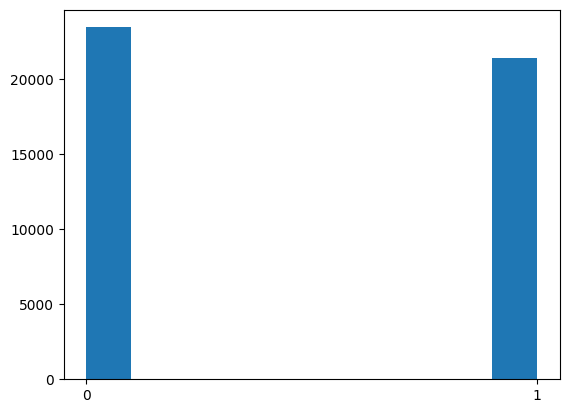

In [7]:
plt.hist(df.category)
plt.xticks([0, 1])
plt.show()

In [8]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
# checking for nan values
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [10]:
df.title.count()

44898

In [11]:
df.subject.value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [28]:
# Shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [29]:
df.head()

,title,text,subject,date,category
0,"FEDS HUNTING FOR MAN Who Sold Fake CIA, FBI Ba...",This is NOT good at all since a guy was caught...,Government News,"Apr 1, 2016",0
1,Arab states urge U.S. to abandon Jerusalem move,CAIRO (Reuters) - Arab foreign ministers late ...,worldnews,"December 9, 2017",1
2,"Lebanon emerges from crisis with Iran on top, ...",BEIRUT (Reuters) - Iran s allies in Lebanon ha...,worldnews,"December 7, 2017",1
3,NATIVE AMERICAN TRIBE Will Offer Cash To Schoo...,"Native Americans continue to battle poverty, j...",left-news,"Jan 8, 2017",0
4,Pakistan's top court rejects challenges to rem...,ISLAMABAD (Reuters) - Pakistan s Supreme Court...,worldnews,"September 15, 2017",1


In [30]:
df.shape

(44898, 5)

## DATA CLEANING

In [37]:
messages = df.copy()
messages.reset_index(inplace=True)

In [38]:
messages.head()

,index,title,text,subject,date,category
0,0,"FEDS HUNTING FOR MAN Who Sold Fake CIA, FBI Ba...",This is NOT good at all since a guy was caught...,Government News,"Apr 1, 2016",0
1,1,Arab states urge U.S. to abandon Jerusalem move,CAIRO (Reuters) - Arab foreign ministers late ...,worldnews,"December 9, 2017",1
2,2,"Lebanon emerges from crisis with Iran on top, ...",BEIRUT (Reuters) - Iran s allies in Lebanon ha...,worldnews,"December 7, 2017",1
3,3,NATIVE AMERICAN TRIBE Will Offer Cash To Schoo...,"Native Americans continue to battle poverty, j...",left-news,"Jan 8, 2017",0
4,4,Pakistan's top court rejects challenges to rem...,ISLAMABAD (Reuters) - Pakistan s Supreme Court...,worldnews,"September 15, 2017",1


In [40]:
messages['title'][4]

"Pakistan's top court rejects challenges to removal of ex-PM Sharif"

In [42]:
messages['title'][44894]

'MARK STEYN and Tucker Carlson Have Epic Exchange on Russia Idiocy: “CNN is flying the network into a black hole and the only plot twist left is Anderson Cooper and Elmo in a spaceship” [Video]'

In [58]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
corpus= []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    
    all_stopwords = set(stopwords.words('english'))
    words_to_remove = [
        'not', 'no', 'never', 'none',
        'news', 'article', 'story', 'report', 'information', 'source', 'publication',
        'very', 'much', 'many', 'more', 'most', 'some', 'few',
        'and', 'but', 'or', 'for', 'with', 'by', 'from', 'in', 'on', 'at',
        'said', 'told', 'according', 'states', 'claimed', 'alleges',
        'according to', 'as reported by', 'in response to', 'based on',
        'today', 'yesterday', 'tomorrow', 'now', 'recently', 'currently'
    ]
    all_stopwords = all_stopwords - set(words_to_remove)

    review = [ps.stem(word) for word in review if not word in all_stopwords]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aman9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
corpus[4]

'pakistan top court reject challeng remov ex pm sharif'

In [61]:
corpus[44894]

'mark steyn and tucker carlson epic exchang on russia idioci cnn fli network black hole and plot twist left anderson cooper and elmo in spaceship video'

BAG OF WORDS

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
cv = CountVectorizer(max_features=14000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [85]:
X.shape

(44898, 14000)

In [66]:
cv.vocabulary_

{'fed': 3850,
 'hunt': 5524,
 'for': 4068,
 'man': 7201,
 'sold': 11225,
 'fake': 3755,
 'cia': 1981,
 'fbi': 3821,
 'attempt': 804,
 'enter': 3507,
 'restrict': 10126,
 'area': 588,
 'hunt for': 5525,
 'arab': 580,
 'state': 11443,
 'urg': 13071,
 'abandon': 1,
 'jerusalem': 6350,
 'move': 7688,
 'arab state': 582,
 'jerusalem move': 6354,
 'lebanon': 6845,
 'emerg': 3453,
 'from': 4502,
 'crisi': 2594,
 'with': 13683,
 'iran': 6211,
 'on': 8423,
 'top': 12161,
 'but': 1541,
 'risk': 10251,
 'remain': 9959,
 'crisi with': 2597,
 'with iran': 13727,
 'iran on': 6217,
 'nativ': 7837,
 'american': 280,
 'tribe': 12296,
 'offer': 8381,
 'cash': 1757,
 'school': 10680,
 'stop': 11533,
 'use': 13107,
 'indian': 6062,
 'in': 5634,
 'live': 6992,
 'poverti': 9326,
 'nativ american': 7838,
 'stop use': 11539,
 'live in': 6994,
 'pakistan': 8861,
 'court': 2515,
 'reject': 9924,
 'challeng': 1837,
 'remov': 9969,
 'ex': 3630,
 'pm': 9188,
 'sharif': 10990,
 'top court': 12164,
 'court reject': 

In [67]:
y = messages['category']

FREQUENT REAL WORDS

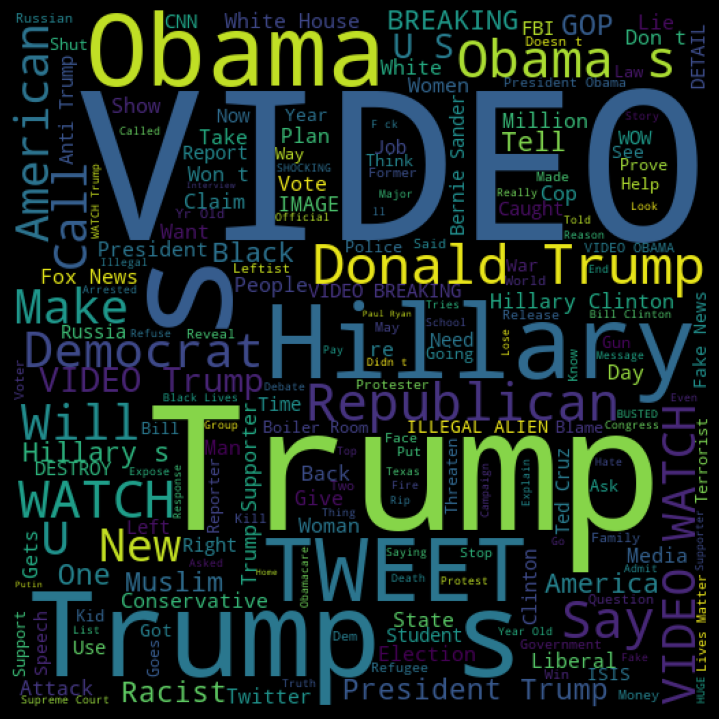

In [69]:
real = ' '.join(list(messages[messages['category']==0]['title']))
real = WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

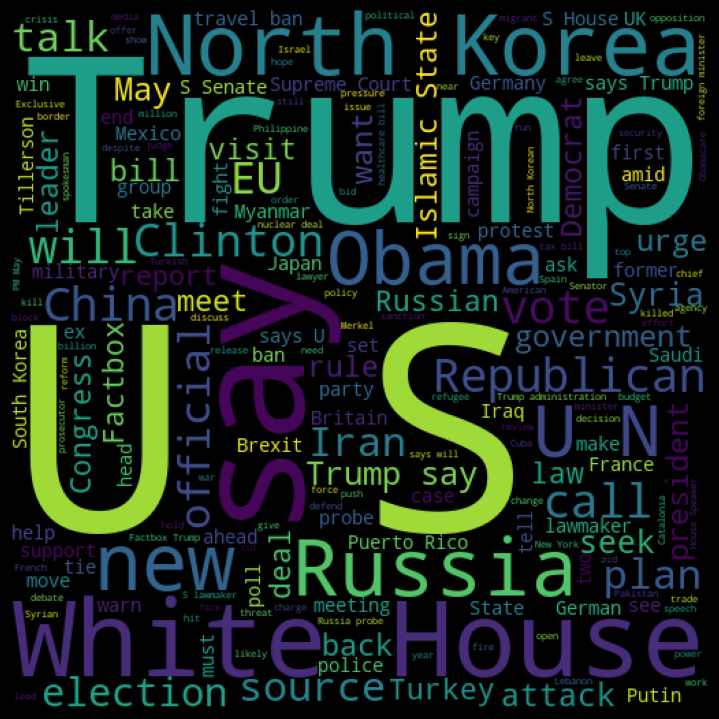

In [72]:
fake = ' '.join(list(messages[messages['category']==1]['title']))
fake = WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

SPLITTING THE DATASET IN TEST AND TRANING SET

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

In [75]:
cv.get_feature_names_out()[:500]

array(['abadi', 'abandon', 'abba', 'abc', 'abc news', 'abdic', 'abduct',
       'abdullah', 'abe', 'abe agre', 'abe say', 'abedin', 'abid', 'abil',
       'abl', 'abort', 'abort babi', 'abort law', 'abort right',
       'abort video', 'abroad', 'abruptli', 'absolut', 'absolut destroy',
       'absurd', 'abu', 'abus', 'academ', 'academi', 'acceler', 'accent',
       'accept', 'accept elect', 'accept elect result', 'accept trump',
       'access', 'access pipelin', 'accid', 'accident', 'accident admit',
       'accomplish', 'accord', 'account', 'account for', 'accur', 'accus',
       'accus hillari', 'accus obama', 'accus russia', 'accus sexual',
       'accus trump', 'accus white', 'achiev', 'acid', 'acknowledg',
       'aclu', 'acorn', 'acosta', 'acr', 'across', 'across america',
       'act', 'act attorney', 'act attorney gener', 'act like', 'act on',
       'act terror', 'act terror video', 'action', 'action in',
       'action on', 'activ', 'activ shooter', 'activ shooter drill',
  

In [76]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 14000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [78]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [79]:
count_df.head(20)

,abadi,abandon,abba,abc,abc news,abdic,abduct,abdullah,abe,abe agre,...,zimbabw rule parti,zimbabwean,zimmerman,zing,zombi,zone,zoo,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


FUNCTION FOR PRINTS AND PLOTING OF CONFUSION MATRIX

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MultinomialNB Algorithm

In [82]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

accuracy:   0.941
Confusion matrix, without normalization


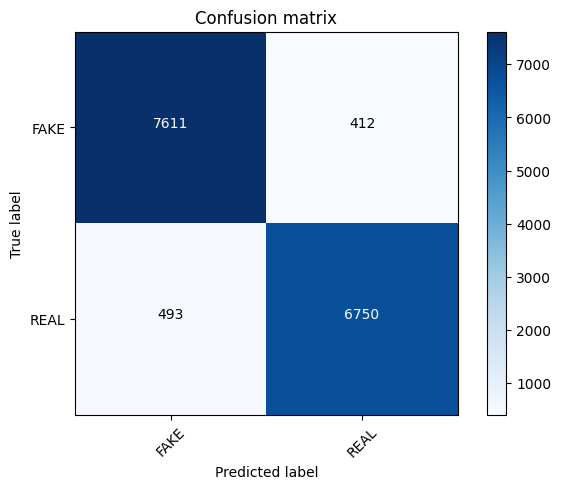

In [83]:
from sklearn import metrics
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])